In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import os

# Shutil is a recursive tool to delete file paths
# Note: Only needed if you plan to overwrite existing filepaths
import shutil

In [211]:
os.getcwd()

'C:\\Users\\admin\\Documents\\__SU22\\DOETrucksMeeting\\Chris\\fit_para'

# Preprocessing Edge Labels

In [45]:
# nodeOrders = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', sheet_name = "RouteMatching", index_col=None, usecols=['Name3', 'Name2'])
# # nodeOrders['Index'] = range(1, len(nodeOrders) + 1)
# # nodeOrders = nodeOrders.set_index('Name')
# # nodeOrders = nodeOrders.to_dict('index')
# # dictionary = {}
# # for k, v in nodeOrders.items():
# #     k1 = k[1:-1]
# #     dictionary[k1] = 
# display(nodeOrders)

In [33]:
a = 'Edge_40p404_-86p853_41p687_-86p149_Raw_Class_8'
a_n = 'Edge_40p404_-86p853_41p684_-86p147'

a = a.split('_')[1:5]
a_n = a_n.split('_')[1:5]

a = [[int(j) for j in i.split('p')] for i in a]
a_n = [[int(j) for j in i.split('p')] for i in a_n]
a, a_n

np.size(a, 0)

def checking(x, y):
    a_ = np.asarray(x)
    b_ = np.asarray(y)
    
    c = [((a_[i][0] == b_[i][0]) and (a_[i][1] >= (b_[i][1]-2)) and (a_[i][1] <= (b_[i][1]+2))) for i in range(np.size(a_, 0))]
    
    return c

checking(a, a_n)


[True, True, False, True]

In [27]:
a_n

[[40, 404], [-86, 853], [41, 686], [-86, 147]]

In [ ]:
# a_n = 'Edge_40p404_-86p853_41p686_-86p150'
# b = a.split('_')[1:5]

In [213]:
# nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
# newFrame = nodes['Route_Name'].to_frame()
# newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
# display(nodes)
# newFrame

In [37]:
# nodeOrders = pd.read_excel('Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx', sheet_name = "RouteMatching", index_col=None, usecols=['Name2', 'Name3'])
# nodeOrders
# nodeOrders = nodeOrders.set_index('Name3')
# nodeOrders = nodeOrders.to_dict('index')
# dictionary = {}
# for k, v in nodeOrders.items():
#     k1 = k[1:-1]
#     # N1 corrections
#     k1 = k1.replace('150', '149')
#     k1 = k1.replace('686', '687')
#     # N3 corrections
#     k1 = k1.replace('41p432', '41p433')
#     k1 = k1.replace('85p268', '85p266')
#     # N11 corrections
#     k1 = k1.replace('41p502', '41p505')
#     k1 = k1.replace('88p132', '88p130')
    
    
#     dictionary[k1] = list(v.values())[0][1:-1]
# dictionary

# # Change 150 to 149

In [215]:
# nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
# a = pd.Series(nodes['StartNode'].values).unique()
# b = pd.Series(nodes['EndNode'].values).unique()
# c = np.union1d(a, b)

# dictionary = {b: a for a, b in enumerate(set(c), 1)}
# np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame = nodes['Route_Name'].to_frame()
# newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
# newFrame = newFrame.set_index('Route_Name')
# display(newFrame)

# dic1 = newFrame.to_dict('index')
# dic2 = {}
# display(dic1)

# for k, v in dic1.items():
#     k1 = k[1:-1]
#     dic2[k1] = list(v.values())
# display(dic2)

In [65]:
dataSourcePath = '0623_hetero\\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx'
df1 = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
#                       'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Fuel Economy',\
                      'Vehicle Static Mass-lbm',\
                      'Cycle Name-none',\
                      'Cargo Mass-lbm'])
# df2['Cycle Name-none'] = df1['Cycle Name-none'].map(dictionary)

# df2[['i', 'j']] = pd.DataFrame(df2['Cycle Name-none'].tolist(), index=df2.index)
# df2.drop('Cycle Name-none', inplace=True, axis=1)

# df.rename(columns = {'Cycle Name-none':'new_col1'}, inplace = True)

In [32]:
nodeOrder = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', \
                          sheet_name = "RouteMatching", \
                          index_col=None, usecols= ['Name3', 'Start Node Name', 'End Node Name', 'Start Node', 'End Node'])
# nodeOrders['Index'] = range(1, len(nodeOrders) + 1)
# nodeOrders = nodeOrders.set_index('Name')
# nodeOrders = nodeOrders.to_dict('index')
# dictionary = {}
# for k, v in nodeOrders.items():
#     k1 = k[1:-1]
#     dictionary[k1] = 
display(nodeOrder)

Start Node  End Node                                 Name3  \
0            1         2  'Edge_41p686_-86p150_41p666_-85p992'   
1            2         1  'Edge_41p666_-85p992_41p686_-86p150'   
2            1         3  'Edge_41p686_-86p150_41p432_-85p268'   
3            3         1  'Edge_41p432_-85p268_41p686_-86p150'   
4            1         4  'Edge_41p686_-86p150_40p404_-86p853'   
5            4         1  'Edge_40p404_-86p853_41p686_-86p150'   
6            1         5  'Edge_41p686_-86p150_40p719_-86p026'   
7            5         1  'Edge_40p719_-86p026_41p686_-86p150'   
8            1         7  'Edge_41p686_-86p150_40p765_-87p111'   
9            7         1  'Edge_40p765_-87p111_41p686_-86p150'   
10           1         8  'Edge_41p686_-86p150_41p442_-86p976'   
11           8         1  'Edge_41p442_-86p976_41p686_-86p150'   
12           1         9  'Edge_41p686_-86p150_41p433_-85p025'   
13           1        10  'Edge_41p686_-86p150_42p021_-88p319'   
14          10         1  'Edge_42p021_-88p319_41p686_-86p150'   
15           1        11  'Edge_41p686_-86p150_41p502_-88p132'   
16          11         1  'Edge_41p502_-88p132_41p686_-86p150'   
17           1        12  'Edge_41p686_-86p150_42p912_-85p661'   
18          12         1  'Edge_42p912_-85p661_41p686_-86p150'   
19           1        13  'Edge_41p686_-86p150_42p253_-85p550'   
20          13         1  'Edge_42p253_-85p550_41p686_-86p150'   
21           1        14  'Edge_41p686_-86p150_42p249_-85p543'   
22          14         1  'Edge_42p249_-85p543_41p686_-86p150'   
23           1        15  'Edge_41p686_-86p150_42p879_-85p552'   
24          15         1  'Edge_42p879_-85p552_41p686_-86p150'   
25           1        16  'Edge_41p686_-86p150_42p761_-85p659'   
26          16         1  'Edge_42p761_-85p659_41p686_-86p150'   
27           2        17  'Edge_41p666_-85p992_42p930_-85p716'   
28           2        18  'Edge_41p666_-85p992_41p399_-82p760'   
29           2         6  'Edge_41p666_-85p992_41p352_-86p332'   
30           6         1  'Edge_41p352_-86p332_41p686_-86p150'   
31           9         2  'Edge_41p433_-85p025_41p666_-85p992'   
32          17         1  'Edge_42p930_-85p716_41p686_-86p150'   
33          18         1  'Edge_41p399_-82p760_41p686_-86p150'   

     Start Node Name     End Node Name  
0   '41p686_-86p150'  '41p666_-85p992'  
1   '41p666_-85p992'  '41p686_-86p150'  
2   '41p686_-86p150'  '41p432_-85p268'  
3   '41p432_-85p268'  '41p686_-86p150'  
4   '41p686_-86p150'  '40p404_-86p853'  
5   '40p404_-86p853'  '41p686_-86p150'  
6   '41p686_-86p150'  '40p719_-86p026'  
7   '40p719_-86p026'  '41p686_-86p150'  
8   '41p686_-86p150'  '40p765_-87p111'  
9   '40p765_-87p111'  '41p686_-86p150'  
10  '41p686_-86p150'  '41p442_-86p976'  
11  '41p442_-86p976'  '41p686_-86p150'  
12  '41p686_-86p150'  '41p433_-85p025'  
13  '41p686_-86p150'  '42p021_-88p319'  
14  '42p021_-88p319'  '41p686_-86p150'  
15  '41p686_-86p150'  '41p502_-88p132'  
16  '41p502_-88p132'  '41p686_-86p150'  
17  '41p686_-86p150'  '42p912_-85p661'  
18  '42p912_-85p661'  '41p686_-86p150'  
19  '41p686_-86p150'  '42p253_-85p550'  
20  '42p253_-85p550'  '41p686_-86p150'  
21  '41p686_-86p150'  '42p249_-85p543'  
22  '42p249_-85p543'  '41p686_-86p150'  
23  '41p686_-86p150'  '42p879_-85p552'  
24  '42p879_-85p552'  '41p686_-86p150'  
25  '41p686_-86p150'  '42p761_-85p659'  
26  '42p761_-85p659'  '41p686_-86p150'  
27  '41p666_-85p992'  '42p930_-85p716'  
28  '41p666_-85p992'  '41p399_-82p760'  
29  '41p666_-85p992'  '41p352_-86p332'  
30  '41p352_-86p332'  '41p686_-86p150'  
31  '41p433_-85p025'  '41p666_-85p992'  
32  '42p930_-85p716'  '41p686_-86p150'  
33  '41p399_-82p760'  '41p686_-86p150'

In [31]:
# a = 'Edge_40p404_-86p853_41p687_-86p149_Raw_Class_8'
# a_n = 'Edge_40p404_-86p853_41p684_-86p147'

# a = a.split('_')[1:5]
# a_n = a_n.split('_')[1:5]

# a = [[int(j) for j in i.split('p')] for i in a]
# a_n = [[int(j) for j in i.split('p')] for i in a_n]
# a, a_n

def checking(x):
    for idx, y in enumerate(nodeOrder['Name3'].values):
        thres = 5
        y = y.replace('\'', '')
        a = x.split('_')[1:5]
        b = y.split('_')[1:5]

        a = [[int(j) for j in i.split('p')] for i in a]
        b = [[int(j) for j in i.split('p')] for i in b]
        
#         print(idx)
#         print(a)
#         print(b)

        # Check if the minutes are within +- 2 
        c = [((a[i][0] == b[i][0]) and (a[i][1] >= (b[i][1]-thres)) and (a[i][1] <= (b[i][1]+thres))) for i in range(np.size(a, 0))]
        
#         print(c)
        
        # If all matches
        if (all(c)):
            # get the start, and end node
            i = nodeOrder['Start Node'].iloc[[idx]].values[0]
            j = nodeOrder['End Node'].iloc[[idx]].values[0]
            return (i, j)
    return np.nan
#             print(i, j)


In [77]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
df2 = df1.copy()

In [78]:
# df1['temp'] = df1['Cycle Name-none'].apply(checking)
temp = df2.columns.get_loc('Cycle Name-none')
df2['temp'] = df2['Cycle Name-none'].apply(checking)

a = pd.DataFrame(df2['temp'].tolist(), index=df2.index)
df2.insert(temp + 1, 'i', a[0])
df2.insert(temp + 2, 'j', a[1])
df2.drop('temp', inplace=True, axis=1)
df2

Vehicle Model-none  \
0        class8_conv_2021_low_sleeper_longhaul_FU19   
1        class8_conv_2021_low_sleeper_longhaul_FU19   
2        class8_conv_2021_low_sleeper_longhaul_FU19   
3        class8_conv_2021_low_sleeper_longhaul_FU19   
4        class8_conv_2021_low_sleeper_longhaul_FU19   
5        class8_conv_2021_low_sleeper_longhaul_FU19   
6        class8_conv_2021_low_sleeper_longhaul_FU19   
7        class8_conv_2021_low_sleeper_longhaul_FU19   
8        class8_conv_2021_low_sleeper_longhaul_FU19   
9        class8_conv_2021_low_sleeper_longhaul_FU19   
10       class8_conv_2021_low_sleeper_longhaul_FU19   
11       class8_conv_2021_low_sleeper_longhaul_FU19   
12       class8_conv_2021_low_sleeper_longhaul_FU19   
13       class8_conv_2021_low_sleeper_longhaul_FU19   
14       class8_conv_2021_low_sleeper_longhaul_FU19   
15       class8_conv_2021_low_sleeper_longhaul_FU19   
16       class8_conv_2021_low_sleeper_longhaul_FU19   
17       class8_conv_2021_low_sleeper_longhaul_FU19   
18       class8_conv_2021_low_sleeper_longhaul_FU19   
19       class8_conv_2021_low_sleeper_longhaul_FU19   
20       class8_conv_2021_low_sleeper_longhaul_FU19   
21       class8_conv_2021_low_sleeper_longhaul_FU19   
22       class8_conv_2021_low_sleeper_longhaul_FU19   
23       class8_conv_2021_low_sleeper_longhaul_FU19   
24       class8_conv_2021_low_sleeper_longhaul_FU19   
25       class8_conv_2021_low_sleeper_longhaul_FU19   
26       class8_conv_2021_low_sleeper_longhaul_FU19   
27       class8_conv_2021_low_sleeper_longhaul_FU19   
28       class8_conv_2021_low_sleeper_longhaul_FU19   
29       class8_conv_2021_low_sleeper_longhaul_FU19   
30       class8_conv_2021_low_sleeper_longhaul_FU19   
31       class8_conv_2021_low_sleeper_longhaul_FU19   
32       class8_conv_2021_low_sleeper_longhaul_FU19   
33       class8_conv_2021_low_sleeper_longhaul_FU19   
34       class8_conv_2021_low_sleeper_longhaul_FU19   
35       class8_conv_2021_low_sleeper_longhaul_FU19   
36       class8_conv_2021_low_sleeper_longhaul_FU19   
37       class8_conv_2021_low_sleeper_longhaul_FU19   
38       class8_conv_2021_low_sleeper_longhaul_FU19   
39       class8_conv_2021_low_sleeper_longhaul_FU19   
40       class8_conv_2021_low_sleeper_longhaul_FU19   
41       class8_conv_2021_low_sleeper_longhaul_FU19   
42       class8_conv_2021_low_sleeper_longhaul_FU19   
43       class8_conv_2021_low_sleeper_longhaul_FU19   
44       class8_conv_2021_low_sleeper_longhaul_FU19   
45       class8_conv_2021_low_sleeper_longhaul_FU19   
46       class8_conv_2021_low_sleeper_longhaul_FU19   
47       class8_conv_2021_low_sleeper_longhaul_FU19   
48       class8_conv_2021_low_sleeper_longhaul_FU19   
49       class8_conv_2021_low_sleeper_longhaul_FU19   
50       class8_conv_2021_low_sleeper_longhaul_FU19   
51       class8_conv_2021_low_sleeper_longhaul_FU19   
52       class8_conv_2021_low_sleeper_longhaul_FU19   
53       class8_conv_2021_low_sleeper_longhaul_FU19   
54       class8_conv_2021_low_sleeper_longhaul_FU19   
55       class8_conv_2021_low_sleeper_longhaul_FU19   
56       class8_conv_2021_low_sleeper_longhaul_FU19   
57       class8_conv_2021_low_sleeper_longhaul_FU19   
58       class8_conv_2021_low_sleeper_longhaul_FU19   
59       class8_conv_2021_low_sleeper_longhaul_FU19   
60       class8_conv_2021_low_sleeper_longhaul_FU19   
61       class8_conv_2021_low_sleeper_longhaul_FU19   
62       class8_conv_2021_low_sleeper_longhaul_FU19   
63       class8_conv_2021_low_sleeper_longhaul_FU19   
64       class8_conv_2021_low_sleeper_longhaul_FU19   
65       class8_conv_2021_low_sleeper_longhaul_FU19   
66       class8_conv_2021_low_sleeper_longhaul_FU19   
67       class8_conv_2021_low_sleeper_longhaul_FU19   
68       class8_conv_2021_low_sleeper_longhaul_FU19   
69       class8_conv_2021_low_sleeper_longhaul_FU19   
70       class8_conv_2021_low_sleeper_longhaul_FU19   
71       class8_conv_2021_low_sleeper_longhaul_FU19   
72       class8_co

In [41]:
df1['i'].unique().max()
# df2.drop('Cycle Name-none', inplace=True, axis=1)

# df.rename(columns = {'Cycle Name-none':'new_col1'}, inplace = True)

18

In [230]:
df2.dropna().reset_index(drop=True)['Cycle Name-none'].unique()

array(['Div27_N4_N1', 'Div27_N8_N1', 'Div27_N2_N1', 'Div27_N1_N4',
       'Div27_N1_N8', 'Div27_N1_N2', 'Div27_N1_N10', 'Div27_N1_N14',
       'Div27_N1_N13', 'Div27_N1_N16', 'Div27_N10_N1', 'Div27_N14_N1',
       'Div27_N13_N1', 'Div27_N16_N1'], dtype=object)

# Performing OLS (with Edge Preprocessing)
### Specialized for vehiecle - class8_conv_2021_daycab_regionalhaul_FU19

Note:  -1 is a dummy value (for self-loops and array padding)

In [88]:
# Setup for csv files index and column labels
df = df2
saveFolderName = "OLS_Data"
parent_dir = os.getcwd()
savePath = os.path.join(parent_dir, saveFolderName)

# If the folder already exists, remove the folder
if os.path.exists(savePath):
    shutil.rmtree(savePath)
os.makedirs(savePath)
    

vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

numNodes = 88
cols = ["i_" + str(i) for i in range(1, numNodes+1)]
rows = ["j_" + str(i) for i in range(1, numNodes+1)]

# Loop for Vehicle Types (k)
for v in vehicleTypes:
    workFrame = df[df["Vehicle Model-none"] == v]
    newFrame = pd.DataFrame(columns = cols, index = rows)

    # Iterate over node values i, j, and assign constants a, b, into "newFrame"
    for i in range(1, numNodes + 1):
        for j in range(1, numNodes + 1):

            data = workFrame.loc[((workFrame['i'] == i) & (workFrame['j'] == j))]

            # edge case if i = j or data Doesn't exist
            if i == j :
                newFrame.iat[i-1, j-1] = -1
                continue
            if data.size == 0:
                newFrame.iat[i-1, j-1] = 0
                continue

            # Doing linear regression here
            if v == 'class8_conv_2021_daycab_regionalhaul_FU19':
                Y = (data.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
            else:
                Y = (data.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
            
            X = (data.loc[:, ['Vehicle Static Mass-lbm']]*0.453592).values.reshape(-1, 1)
            LR = LinearRegression()  # create object for the class
            LR.fit(X, Y)  # perform linear regression

            # Assigning the calculated a, b params
            newFrame.iat[j - 1, i - 1] = (LR.coef_.item(0), LR.intercept_.item(0))

    # Create the filePath
    tempPath2 = os.path.join(savePath, v + ".csv")
    tempPath3 = os.path.join(savePath, v + ".pkl")
    newFrame.to_csv(tempPath2)
    newFrame.to_pickle(tempPath3)

In [80]:
dataSourcePath = 'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx'
dataSourcePath[:-5] + "node_label.xlsx"

'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics'

# Function: generateData
### Performs OLS on every edge and saves a, b into csv and pickle files 

> (bool) freight : Freight mode calculation on or off  
(str) dataSourcePath : Source data file path (.xlsx)  
(str) saveFolderName : Name of the folder to save the data (non-existing)

## Note:  -1 is a dummy value (for self-loops and array padding)

In [2]:
def generateData (dataSourcePath = 'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx', \
                  saveFolderName = "OLS_Data",\
                  freight = False,\
                  preprocessing = True,\
                 ):
    parent_dir = os.getcwd()
    savePath = os.path.join(parent_dir, saveFolderName)
    
    # If the old date folder already exists, remove the folder
    print('Checking for prexisting data')
    if os.path.exists(savePath):
        shutil.rmtree(savePath)
        print('Removed ', savePath)

    if os.path.exists(dataSourcePath[:-5] + "_node_label.xlsx"):
        os.remove(dataSourcePath[:-5] + "_node_label.xlsx")
        print('Removed ', dataSourcePath[:-5] + "_node_label.xlsx")

    print('Removed all existing previous Data!\n')
    os.makedirs(savePath)
    
    # Load and trim Data
    print('Loading Data...')
    df = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                          'Battery Energy Consumption per Mile-kWh/mi',\
                          'Vehicle Static Mass-lbm',\
#                           'Cycle Source-none',\
                          'Fuel Economy-mpg',\
                          'Cycle Name-none',\
                          'Cargo Mass-lbm'])
    # Doing conversions
    df['Fuel Economy-mpg'] = df['Fuel Economy-mpg']*1.60934
    df['Cargo Mass-lbm'] = df['Cargo Mass-lbm']*0.453592
    df['Vehicle Static Mass-lbm'] = df['Vehicle Static Mass-lbm']*0.453592
    df['Battery Energy Consumption per Mile-kWh/mi'] = df['Battery Energy Consumption per Mile-kWh/mi']/1.60934
    df = df.rename(columns={'Fuel Economy-mpg': 'Fuel Economy-km/g', 'Cargo Mass-lbm' : 'Cargo Mass-kg',\
                            'Vehicle Static Mass-lbm' : 'Vehicle Static Mass-kg', 'Battery Energy Consumption per Mile-kWh/mi' : 'Battery Energy Consumption per Mile-kWh/km'})
    
    print('Done Loading Data!\n')
    
    if preprocessing == True:
        print('Preprocessing Data...')
        nodeOrder = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', \
                          sheet_name = "RouteMatching", \
                          index_col=None, usecols= ['Name3', 'Start Node Name', 'End Node Name', 'Start Node', 'End Node'])

        def checking(x):
            for idx, y in enumerate(nodeOrder['Name3'].values):
                thres = 5
                y = y.replace('\'', '')
                a = x.split('_')[1:5]
                b = y.split('_')[1:5]

                a = [[int(j) for j in i.split('p')] for i in a]
                b = [[int(j) for j in i.split('p')] for i in b]

                # Check if the minutes are within +- 2 
                c = [((a[i][0] == b[i][0]) and (a[i][1] >= (b[i][1]-thres)) and (a[i][1] <= (b[i][1]+thres))) for i in range(np.size(a, 0))]

                # If all matches
                if (all(c)):
                    # get the start, and end node
                    i = nodeOrder['Start Node'].iloc[[idx]].values[0]
                    j = nodeOrder['End Node'].iloc[[idx]].values[0]
                    return (i, j)
            return np.nan
        
#         df['Cycle Name-none'] = df['Cycle Name-none'].apply(checking)
#         df[['i', 'j']] = pd.DataFrame(df['Cycle Name-none'].tolist(), index=df.index)
#         df.drop('Cycle Name-none', inplace=True, axis=1)
        
        # Saving the sheet with the nodes labelled
        temp = df.columns.get_loc('Cycle Name-none')
        df['temp'] = df['Cycle Name-none'].apply(checking)

        a = pd.DataFrame(df['temp'].tolist(), index=df.index)
        df.insert(temp + 1, 'start_node', a[0])
        df.insert(temp + 2, 'end_node', a[1])
        df.drop('temp', inplace=True, axis=1)
        df.to_excel(dataSourcePath[:-5] + "_node_label.xlsx")
        df = df.rename(columns={'start_node': 'i', 'end_node' : 'j'})

        # Return the total number of nodes here
        numNodes = max(df['i'].unique().max(), df['j'].unique().max())
        print('Labelled version of the sheet saved as: ', dataSourcePath[:-5] + "_node_label.xlsx")
        
    else:

        # Function to look for the number of nodes from a list of strings in the source file
        def findNumNodes(sentence_arr):
            running_max = 1
            length = len(sentence_arr)
            i_val = np.full(length, 0)
            j_val = np.full(length, 0)
            for index, sentence in enumerate(sentence_arr):

                # Split the string, and get the corresponding node values
                temp = sentence.lower().split('div')[1].split('_raw')[0].split('_')
                j = temp[-1]
                i = temp[-2]
                j = int(''.join([x for x in j if x.isdigit()]))
                i = int(''.join([x for x in i if x.isdigit()]))
                running_max = max(i, j, running_max)
                i_val[index], j_val[index] = i, j
            return running_max, i_val, j_val

        # Adding "i" and "j" columns for lookup convenience later in code
        numNodes, i_val, j_val = findNumNodes(df["Cycle Source-none"].values)
        df.drop("Cycle Source-none", axis = 'columns')
        df['i'], df['j'] = i_val, j_val
    
    print('Done Preprocessing Data!\n')
    
    # Setup for csv files index and column labels
    cols = ["i_" + str(i) for i in range(1, numNodes+1)]
    rows = ["j_" + str(i) for i in range(1, numNodes+1)]
    
    # Getting information from the dataframe
    vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()
                   
    # Loop for Vehicle Types (k)
    for v in vehicleTypes:
        # Check if the vehicle is conv or bev
        conv  = (v.find('conv' ) != -1)
        erev  = (v.find('erev' ) != -1)
        fchev = (v.find('fchev') != -1)
        
        # if it is a hybrid, skip for now
        if fchev :
            continue
        
        workFrame = df[df["Vehicle Model-none"] == v]
        newFrame = pd.DataFrame(columns = cols, index = rows)
        print('\nFor Vehiecle: ', v)
        print('Detected type: ', ('conv' if conv else 'bev'))
        
        if freight == True:
            x_val = 'Cargo Mass-kg'
        else:
            x_val = 'Vehicle Static Mass-kg'    
        if conv == True:
            y_val = 'Fuel Economy-km/g'
        else:
            y_val = 'Battery Energy Consumption per Mile-kWh/km'
        
        print('LR Using:', '\nx_val = ', x_val, '\ny_val = ', y_val, '\n')
        
        # Iterate over node values i, j, and assign constants a, b, into "newFrame"
        for i in range(1, numNodes + 1):
            for j in range(1, numNodes + 1):
                data = workFrame.loc[((workFrame['i'] == i) & (workFrame['j'] == j))]
                
                # edge case if i = j or data Doesn't exist
                if i == j :
                    newFrame.iat[j - 1, i - 1] = -1
                    continue
#                 print('For i = ', i, ' , j = ', j, ': size: ', data.size)
                if data.size == 0:
                    newFrame.iat[j - 1, i - 1] = 0
                    continue

                # Doing linear regression here
                X = (data.loc[:, [x_val]]).values.reshape(-1, 1)
                Y = (data.loc[:, [y_val]]).values.reshape(-1, 1)
                LR = LinearRegression()  # create object for the class
                LR.fit(X, Y)  # perform linear regression

                # Assigning the calculated a, b params
                newFrame.iat[j - 1, i - 1] = (LR.coef_.item(0), LR.intercept_.item(0))
#                     print('(', LR.coef_.item(0), ', ', LR.intercept_.item(0),')')
    
        # Create the filePath
        tempPath2 = os.path.join(savePath, v + ".csv")
        tempPath3 = os.path.join(savePath, v + ".pkl")
        newFrame.to_csv(tempPath2)
        newFrame.to_pickle(tempPath3)
#         break

In [3]:
dataSourcePath = '0623_hetero\\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx'
generateData(dataSourcePath, saveFolderName = "OLS_Data")

Checking for prexisting data
Removed  C:\Users\admin\Documents\__SU22\DOETrucksMeeting\Ruiting\OLS_6_26\OLS_Data
Removed  0623_hetero\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics_node_label.xlsx
Removed all existing previous Data!

Loading Data...
Done Loading Data!

Preprocessing Data...
Labelled version of the sheet saved as:  0623_hetero\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics_node_label.xlsx
Done Preprocessing Data!


For Vehiecle:  class8_conv_2021_low_sleeper_longhaul_FU19
Detected type:  conv
LR Using: 
x_val =  Vehicle Static Mass-kg 
y_val =  Fuel Economy-km/g 


For Vehiecle:  class8_mild48v_2021_low_sleeper_longhaul_FU19
Detected type:  bev
LR Using: 
x_val =  Vehicle Static Mass-kg 
y_val =  Battery Energy Consumption per Mile-kWh/km 


For Vehiecle:  class8_erev_2021_low_sleeper_longhaul_FU19
Detected type:  bev
LR Using: 
x_val =  Vehicle Static Mass-kg 
y_val =  Battery Energy Consumption per Mile-kWh/km 


For Vehiecle:  class8_bev_2021_low_sleeper_

In [6]:
if (-1):
    print(True)

True


# Function: readData
 ### Reads the source folder generated by the  "generateData" function returns a, b, as dictionaries.
> Input:  
(str) saveFolderName: Name of source folder created by generateData
  
Output: 
>a [ k ][ i ][ j ]  
b [ k ][ i ][ j ] 


> (str) k : Vehiecle Type       
(int) i : i-node , index starts from 1  
(int) j : j-node , index starts from 1  

## Note:  -1 is a dummy value (for self-loops and array padding)

In [93]:
# Reads out the data and collects them into a dictionary.
def readDataCSV (saveFolderName = "OLS_Data"):
    
    # Initialize some folderpath
    path = os.path.join(os.getcwd(), saveFolderName)
    
    # If the folder doesn't exist, print error and return
    if not os.path.exists(path):
        print("Error, Source Folder Doesn't exist")
        return 
    VehiecleTypesPath = [ fi for fi in os.listdir(path) if fi.endswith(".pkl") ]
    VehiecleTypes = [i[:len(i) - 4] for i in VehiecleTypesPath] # change to use split or something else
    
    # Get the number of nodes brute forcedly
    filePath = os.path.join(path, VehiecleTypesPath[0])
    df = pd.read_pickle(filePath)
    numNodes = np.shape(df.iloc[:, 0].values)[0]
    
    # Initializing return dictionary
    a = {}
    b = {}

    for ind, v in enumerate(VehiecleTypes):
        filePath = os.path.join(path, v + ".pkl")
        df = pd.read_pickle(filePath)
        
        # initialize an empty array to store the days
        a[v] = np.full((numNodes + 1, numNodes + 1), -1, dtype = float)
        b[v] = np.full((numNodes + 1, numNodes + 1), -1, dtype = float)
        
        results = df.to_numpy().transpose()
        for i, temp in enumerate(results, 1):
            for j, ab in enumerate(temp, 1):
                if type(ab) == tuple:
                    a[v][i][j], b[v][i][j] = ab[0], ab[1] 
                else:
                    a[v][i][j], b[v][i][j] = ab, ab
                    
    return a, b

In [94]:
a, b = readDataCSV()

In [97]:
# Example lookup
k = 'class8_conv_2021_daycab_regionalhaul_FU19'
i = 73
j = 1

a[k][i][j], b[k][i][j] 

(1.2946130315967237e-06, 0.04638218052947553)

# Testing Code 
### Performs a series of random lookup and regenerates the OLS coefficients to see if they match

In [96]:
# SET TESTING PARAMETERS HERE!!
vehiecles = ['class8_bev_2021_daycab_regionalhaul_FU19', 'class8_conv_2021_daycab_regionalhaul_FU19']
Nodes     = 88 # Starting from 1
freight   = False

In [ ]:
# Data Preparation Before Testing
dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx'
# workframe = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
#                           'Battery Energy Consumption per Mile-kWh/mi',\
#                           'Vehicle Static Mass-lbm',\
#                           'Cargo Mass-lbm',\
#                           "Cycle Source-none"])

workframe = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Vehicle Static Mass-lbm',\
                      'Cycle Name-none'])

nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
a = pd.Series(nodes['StartNode'].values).unique()
b = pd.Series(nodes['EndNode'].values).unique()
c = np.union1d(a, b)

dictionary = {b: a for a, b in enumerate(set(c), 1)}
np.vectorize(dictionary.get)(nodes['StartNode'])
newFrame = nodes['Route_Name'].to_frame()
newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
newFrame = newFrame.set_index('Route_Name')
display(newFrame)

dic1 = newFrame.to_dict('index')
dic2 = {}
display(dic1)

for k, v in dic1.items():
    k1 = k[1:-1]
    dic2[k1] = list(v.values())
display(dic2)

# def label_ij(sentence_arr):
#     length = len(sentence_arr)
#     i_val = np.full(length, 0)
#     j_val = np.full(length, 0)
    
#     for index, sentence in enumerate(sentence_arr):
        
#         # Split the string, and get the corresponding node values
#         temp = sentence.lower().split('div')[1].split('_raw')[0].split('_')
#         j = temp[-1]
#         i = temp[-2]
#         j = int(''.join([x for x in j if x.isdigit()]))
#         i = int(''.join([x for x in i if x.isdigit()]))
#         i_val[index], j_val[index] = i, j
#     return i_val, j_val

# # Adding "i" and "j" columns for lookup convenience later in code
# i_val, j_val = label_ij(workframe["Cycle Source-none"].values)
# workframe['i'], workframe['j'] = i_val, j_val
# workframe = workframe.drop("Cycle Source-none", axis = 'columns')

# Conversions into metric
# workframe["Cargo Mass-lbm"] = 0.453592 * workframe["Cargo Mass-lbm"]
workframe["Vehicle Static Mass-lbm"] = 0.453592 * workframe["Vehicle Static Mass-lbm"]
workframe['Battery Energy Consumption per Mile-kWh/mi'] = workframe['Battery Energy Consumption per Mile-kWh/mi']/1.60934
workframe['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi'] = workframe['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']/(1.60934*100)
# workframe = workframe.rename(columns={'Cargo Mass-lbm': 'CargoMass-kg', 'Vehicle Static Mass-lbm': 'VehicleMass-kg', 'Battery Energy Consumption per Mile-kWh/mi' : 'Energy_kwh_km'})
workframe = workframe.rename(columns={'Vehicle Static Mass-lbm': 'VehicleStaticMass-kg', 'Battery Energy Consumption per Mile-kWh/mi' : 'Energy_kwh_km', 'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi' : 'FuelperGal. gal/mi'})

workframe

In [ ]:
# Execute functions to be tested
generateData(freight, dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx', saveFolderName = "OLS_Data")
a, b = readDataCSV()

In [ ]:
# Random node Testing Loop starts here

testing_count = 1000

for i in range(1, testing_count + 1):
    
    test_i = np.random.randint(1, Nodes + 1)
    test_j = np.random.randint(1, Nodes + 1)
    test_v = np.random.choice(vehiecles)
    
    print("Testing #" , i, "for: i=", test_i, " , j=", test_j, " , vehiecle: ",test_v)
    
    data = workframe.loc[((workframe['Vehicle Model-none'] == test_v) & (workframe['i'] == test_i) & (workframe['j'] == test_j))]
    
    # edge case if i = j or data Doesn't exist
    if test_i == test_j :
        assert a[test_v][test_i][test_j] == -1
        assert b[test_v][test_i][test_j] == -1
    else:
        # Doing linear regression here
        if freight:
            X = (data.loc[:, ["CargoMass-kg"]]).values.reshape(-1, 1)
        else:
            X = (data.loc[:, ["VehicleMass-kg"]]).values.reshape(-1, 1)
            
        Y = (data.loc[:, ['Energy_kwh_km']]).values.reshape(-1, 1)
        LR = LinearRegression()  # create object for the class
        LR.fit(X, Y)  # perform linear regression

        if a[test_v][test_i][test_j] != LR.coef_.item(0):
            print("Error: ", a[test_v][test_i][test_j], "!= ", LR.coef_.item(0))
            display(data)
            break
        if b[test_v][test_i][test_j] != LR.intercept_.item(0):
            print("Error: ", b[test_v][test_i][test_j], "!= ", LR.intercept_.item(0))
            display(data)
            break

# Single parameters-set OLS Calculator

In [ ]:
# Set parameters here to calculate OLS coefficients
vehiecles = ['class8_bev_2021_daycab_regionalhaul_FU19', 'class8_conv_2021_daycab_regionalhaul_FU19']
vehiecle  = vehiecles[0]
i         = 1
j         = 2
freight   = False

In [ ]:
data = workframe.loc[((workframe['Vehicle Model-none'] == vehiecle) & (workframe['i'] == i) & (workframe['j'] == j))]

if freight:
    X = (data.loc[:, ["CargoMass-kg"]]).values.reshape(-1, 1)
    x_label = "CargoMass-kg"
else:
    X = (data.loc[:, ["VehicleMass-kg"]]).values.reshape(-1, 1)
    x_label = "VehicleMass-kg"
    
Y = (data.loc[:, ['Energy_kwh_km']]).values.reshape(-1, 1)
y_label = 'Energy_kwh_km'
LR = LinearRegression()  # create object for the class
LR.fit(X, Y)  # perform linear regression
Y_pred = LR.predict(X)  # make predictions

# Data Visualization
display(data)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(y_label)
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0))

# Edge-independent constant calculations

In [11]:
# dataSourcePath = 'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx'
dataSourcePath = '0623_hetero\\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx'

df = pd.read_excel(os.path.join(os.getcwd(), dataSourcePath), \
#                    sheet_name = "DOE",\
                   index_col=None, \
                   usecols=['Vehicle Model-none',\
                            'Fuel Type-none',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Fuel Economy-mpg',\
                      'Vehicle Static Mass-lbm'\
                           ]
                  )
print(os.path.join(os.getcwd(), dataSourcePath))
display(df)

C:\Users\admin\Documents\__SU22\DOETrucksMeeting\Ruiting\OLS_6_26\0623_hetero\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx


Vehicle Model-none Fuel Type-none  \
0     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
1     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
2     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
3     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
4     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
...                                          ...            ...   
6523  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6524  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6525  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6526  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6527  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   

      Vehicle Static Mass-lbm  Fuel Economy-mpg  \
0                       20000         12.033461   
1                       20000         12.619724   
2                       32000         10.624204   
3                       32000         11.364436   
4                       44000          9.448981   
...                       ...               ...   
6523                    56000          8.092706   
6524                    68000          6.488627   
6525                    68000          7.427797   
6526                    80000          5.963154   
6527                    80000          6.886548   

      Battery Energy Consumption per Mile-kWh/mi  
0                                       0.000015  
1                                       0.000015  
2                                       0.000015  
3                                       0.000015  
4                                       0.000015  
...                                          ...  
6523                                   -0.003431  
6524                                    0.015644  
6525                                    0.005861  
6526                                    0.033063  
6527                                    0.015617  

[6528 rows x 5 columns]

In [6]:
# vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

# workFrame1 = df[df["Vehicle Model-none"] == vehicleTypes[0]]
# workFrame2 = df[df["Vehicle Model-none"] == vehicleTypes[1]]

# X = (workFrame1.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
# Y = (workFrame1.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
# Z = (workFrame1.loc[:, ['Average Total Speed-mph']]*1.60934).values.reshape(-1, 1)
# LR = LinearRegression()  # create object for the class
# LR.fit(X, Z)  # perform linear regression
# Z_pred = LR.predict(X)  # make predictions
# x_label = "Cargo Mass (kg)"
# y_label = 'Fuel Consumption per km Diesel (gal/km)'
# z_label = 'Average Total Speed-kmph'

# # Data Visualization
# plt.scatter(X, Z)
# plt.plot(X, Z_pred, color='red')
# plt.xlabel(x_label)
# plt.ylabel(z_label)
# plt.title(vehicleTypes[0])
# print(vehicleTypes[0])
# print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')
# vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()


# X = (workFrame1.loc[:, ['Vehicle Static Mass-lbm']]*0.453592).values.reshape(-1, 1)
# LR = LinearRegression()  # create object for the class
# LR.fit(X, Z)  # perform linear regression
# Z_pred = LR.predict(X)  # make predictions
# x_label = "Vehicle Static Mass (kg)"
# y_label = 'Fuel Consumption per km Diesel (gal/km)'
# z_label = 'Average Total Speed-kmph'

# # Data Visualization
# plt.figure(2)
# plt.scatter(X, Z)
# plt.plot(X, Z_pred, color='red')
# plt.xlabel(x_label)
# plt.ylabel(z_label)
# plt.title(vehicleTypes[0])
# print(vehicleTypes[0])
# print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')



# X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
# Y = (workFrame2.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
# Z = (workFrame2.loc[:, ['Average Total Speed-mph']]*1.60934).values.reshape(-1, 1)
# LR = LinearRegression()  # create object for the class
# LR.fit(X, Z)  # perform linear regression
# Z_pred = LR.predict(X)  # make predictions
# x_label = "Cargo Mass (kg)"
# y_label = 'Fuel Consumption per km Diesel (gal/km)'
# z_label = 'Average Total Speed-kmph'

# # Data Visualization
# plt.figure(3)
# plt.scatter(X, Z)
# plt.plot(X, Z_pred, color='red')
# plt.xlabel(x_label)
# plt.ylabel(z_label)
# plt.title(vehicleTypes[1])
# print(vehicleTypes[1])
# print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')
# vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

In [7]:
# dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx'
# df2 = pd.read_excel(os.path.join(os.getcwd(), dataSourcePath), \
#                    sheet_name = "DOE",\
#                    index_col=None, \
#                    usecols=['Vehicle Model-none',\
#                       'Battery Energy Consumption per Mile-kWh/mi',\
#                       'Average Total Speed-mph',\
#                       'Cargo Mass-lbm']
#                   )
# print(os.path.join(os.getcwd(), dataSourcePath))
# display(df2)

In [12]:
# For Hydrogen fuel cell vehiecles
# df = df[df["Fuel Type-none"] == 'Diesel #2']
x_col = 'Vehicle Static Mass-lbm'
y_col_con = 'Fuel Economy-mpg'
y_col_ev = 'Battery Energy Consumption per Mile-kWh/mi'
df

Vehicle Model-none Fuel Type-none  \
0     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
1     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
2     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
3     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
4     class8_conv_2021_low_sleeper_longhaul_FU19      Diesel #2   
...                                          ...            ...   
6523  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6524  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6525  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6526  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   
6527  class8_fchev_2021_daycab_regionalhaul_FU19       Hydrogen   

      Vehicle Static Mass-lbm  Fuel Economy-mpg  \
0                       20000         12.033461   
1                       20000         12.619724   
2                       32000         10.624204   
3                       32000         11.364436   
4                       44000          9.448981   
...                       ...               ...   
6523                    56000          8.092706   
6524                    68000          6.488627   
6525                    68000          7.427797   
6526                    80000          5.963154   
6527                    80000          6.886548   

      Battery Energy Consumption per Mile-kWh/mi  
0                                       0.000015  
1                                       0.000015  
2                                       0.000015  
3                                       0.000015  
4                                       0.000015  
...                                          ...  
6523                                   -0.003431  
6524                                    0.015644  
6525                                    0.005861  
6526                                    0.033063  
6527                                    0.015617  

[6528 rows x 5 columns]

class8_conv_2021_low_sleeper_longhaul_FU19
a =  1.3403526996101927e-06 , b =  0.04211225866802716 



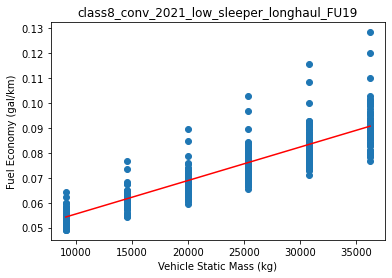

class8_mild48v_2021_low_sleeper_longhaul_FU19
a =  -7.356040773871423e-08 , b =  0.007432584581937534 



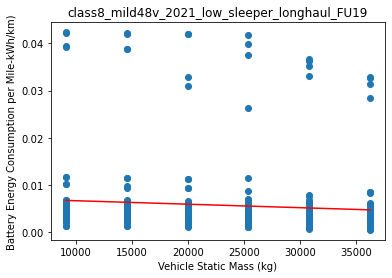

class8_erev_2021_low_sleeper_longhaul_FU19
a =  6.329917001737455e-06 , b =  0.5182748938705259 



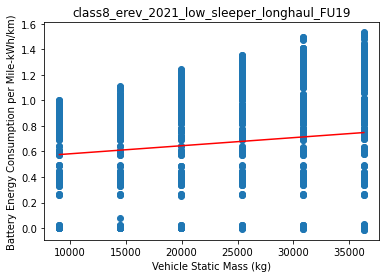

class8_bev_2021_low_sleeper_longhaul_FU19
a =  1.9507841320050557e-05 , b =  0.6878216753995159 



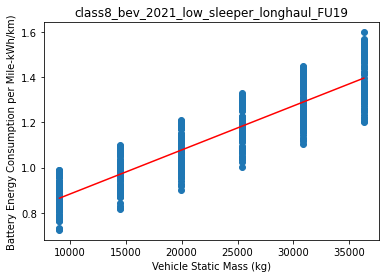

class8_fchev_2021_low_sleeper_longhaul_FU19
a =  1.4345965305075863e-06 , b =  -0.04228583504736414 



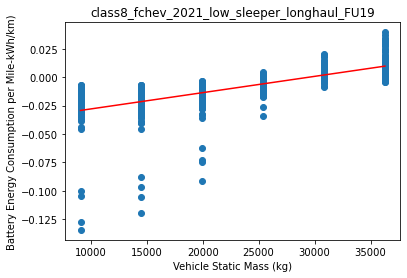

class8_conv_2021_daycab_regionalhaul_FU19
a =  1.3236706931768753e-06 , b =  0.04340490756067136 



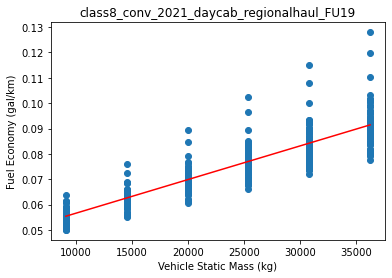

class8_mild48v_2021_daycab_regionalhaul_FU19
a =  -5.895281782703819e-08 , b =  0.007223687851337263 



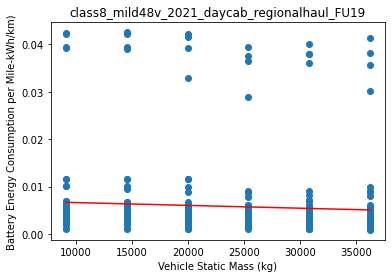

class8_erev_2021_daycab_regionalhaul_FU19
a =  1.976874744755488e-06 , b =  0.3765160848002246 



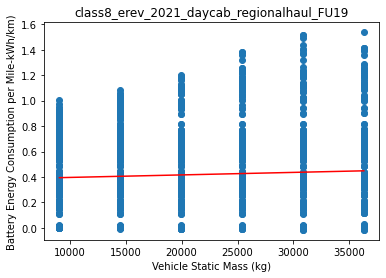

class8_bev_2021_daycab_regionalhaul_FU19
a =  2.0218688029168285e-05 , b =  0.7053941877084702 



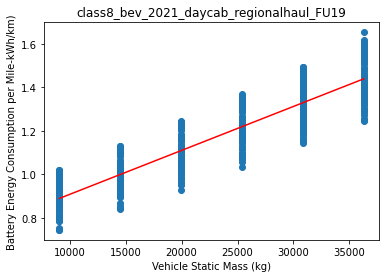

class8_fchev_2021_daycab_regionalhaul_FU19
a =  1.4546590227597492e-06 , b =  -0.04217709181224981 



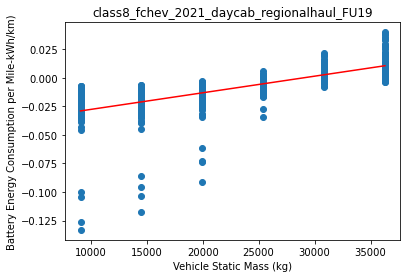

In [14]:
vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

for v in vehicleTypes:
    workFrame1 = df[df["Vehicle Model-none"] == v]
#     workFrame2 = df[df["Vehicle Model-none"] == vehicleTypes[1]]
    conv = (v.find('conv') != -1)
    if conv:
        # Conversion from 'mi/gal' -> 'gal/km'
        Y = ((1/(workFrame1.loc[:, [y_col_con]]))*(1/1.60934)).values.reshape(-1, 1)
        y_label = 'Fuel Economy (gal/km)'
    else :
        # Conversion from 'kWh/mi' -> 'kWh/km'
        Y = ((workFrame1.loc[:, [y_col_ev]]/1.60934)).values.reshape(-1, 1)
        y_label = 'Battery Energy Consumption per Mile-kWh/km)'
        
    X = (workFrame1.loc[:, [x_col]]*0.453592).values.reshape(-1, 1)

    # Z = (workFrame1.loc[:, ['Average Total Speed-mph']]/1.60934).values.reshape(-1, 1)
    # LR = LinearRegression()  # create object for the class
    # LR.fit(X, Y, Z)  # perform linear regression
    # Y_pred = LR.predict(X)  # make predictions
    # x_label = "Cargo Mass (kg)"
    # y_label = 'Fuel Consumption per km Diesel (gal/km)'
    # z_label = 'Fuel Consumption per km Diesel (gal/km)'


    # # Data Visualization
    # plt.scatter(X, Y)
    # plt.plot(X, Y_pred, color='red')
    # plt.xlabel(x_label)
    # plt.ylabel(y_label)
    # plt.title(vehicleTypes[0])
    # print(vehicleTypes[0])
    # print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')

    # X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
    # Y = (workFrame2.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
    LR = LinearRegression()  # create object for the class
    LR.fit(X, Y)  # perform linear regression
    x_label = "Vehicle Static Mass (kg)"
    Y_pred = LR.predict(X)  # make predictions

    # Data Visualization
    plt.figure()
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(v)
    print(v)
    print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')
    plt.show()


    # ### LAST 2 plots for Sleeper
    # vehicleTypes = pd.Series(df2['Vehicle Model-none'].values).unique()

    # workFrame1 = df2[df2["Vehicle Model-none"] == vehicleTypes[0]]
    # workFrame2 = df2[df2["Vehicle Model-none"] == vehicleTypes[1]]

    # X = (workFrame1.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
    # Y = (workFrame1.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
    # LR = LinearRegression()  # create object for the class
    # LR.fit(X, Y)  # perform linear regression
    # Y_pred = LR.predict(X)  # make predictions
    # x_label = "Cargo Mass (kg)"
    # y_label = 'Fuel Consumption per km Diesel (gal/km)'


    # # Data Visualization
    # plt.figure(3)
    # plt.scatter(X, Y)
    # plt.plot(X, Y_pred, color='red')
    # plt.xlabel(x_label)
    # plt.ylabel(y_label)
    # plt.title(vehicleTypes[0])
    # print(vehicleTypes[0])
    # print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')

    # X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
    # Y = (workFrame2.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
    # LR = LinearRegression()  # create object for the class
    # LR.fit(X, Y)  # perform linear regression
    # x_label = "Cargo Mass (kg)"
    # y_label = 'Battery Energy Consumption per km (kWh/km)'
    # Y_pred = LR.predict(X)  # make predictions

    # # Data Visualization
    # plt.figure(4)
    # plt.scatter(X, Y)
    # plt.plot(X, Y_pred, color='red')
    # plt.xlabel(x_label)
    # plt.ylabel(y_label)
    # plt.title(vehicleTypes[1])
    # print(vehicleTypes[1])
    # print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0))

In [10]:
pow(16, 2)

256